# Classification Using K-Nearest Neighbors (K-NN) and Logistic Regression

## Goal:
The objective of this notebook will be to perform **classification** on the `diabetes_prediction_dataset.csv` public dataset. I'll aim to predict if a person has diabetes based on several health-related features that are present in the dataset using two machine learning models:
1. **Logistic Regression**
2. **K-Nearest Neighbors (K-NN)**

## Steps:
1. **Data Preprocessing**:
   - Load the dataset and understand its structure.
   - Handle any missing or inconsistent data.
   - Standardize the features to prepare them for K-NN and Logistic Regression.

2. **Model Training**:
   - Train a Logistic Regression model and evaluate the performance.
   - Train a K-Nearest Neighbors model and tune the `k` parameter for best results.

3. **Model Evaluation**:
   - Evaluate both models using performance metrics like:
     - Accuracy
   - Compare the performance of both models.

4. **Conclusion**:
   - Summarize findings and determine which model performs better for this dataset.

### Load and Inspect the Dataset
- Load the `diabetes_prediction_dataset.csv` file.
- Check the dataset's structure, column names, and data types.
- Display basic statistics and check for missing valus.


In [3]:
from sklearn import neighbors
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
cal_df = pd.read_csv("diabetes_prediction_dataset.csv")

print (cal_df.describe())
print(cal_df.info())
cal_df.isnull().sum()

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Encoding Categorical Variables
To make the categorical variables usable by the Linear Regression model, we applied **Label Encoding** to the following columns:
- **`Gender`**
- **`Smoking History`**

Label Encoding converts each category in these columns into a unique integer. 

After encoding, these columns are now numeric and suitable for use.

In [5]:
LE = LabelEncoder()
cal_df['gender'] = LE.fit_transform(cal_df['gender'])
cal_df['smoking_history'] = LE.fit_transform(cal_df['smoking_history'])

print(cal_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  int32  
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  int32  
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int32(2), int64(4)
memory usage: 6.1 MB
None


### Standardizing Data
To ensure all features are on the same scale, we applied **Standardization** to the dataset using `StandardScaler`.
This process transforms each feature so that:
- The **mean** is 0.
- The **standard deviation** is 1.

Steps:
1. Extracted column names from the dataset to retain them after scaling.
2. Used `StandardScaler` to scale all numerical columns in the DataFrame.
3. Converted the scaled data back into a DataFrame with the original column names for clarity.

In [7]:
names = cal_df.columns
scaler = StandardScaler()
scaled_values = scaler.fit_transform(cal_df)
scaled_df = pd.DataFrame(scaled_values, columns=names) 

print(scaled_df.head())

     gender       age  hypertension  heart_disease  smoking_history       bmi  \
0 -0.841047  1.692704     -0.284439       4.936379         0.963327 -0.321056   
1 -0.841047  0.538006     -0.284439      -0.202578        -1.153468 -0.000116   
2  1.187234 -0.616691     -0.284439      -0.202578         0.963327 -0.000116   
3 -0.841047 -0.261399     -0.284439      -0.202578        -0.624269 -0.583232   
4  1.187234  1.515058      3.515687       4.936379        -0.624269 -1.081970   

   HbA1c_level  blood_glucose_level  diabetes  
0     1.001706             0.047704 -0.304789  
1     1.001706            -1.426210 -0.304789  
2     0.161108             0.489878 -0.304789  
3    -0.492690             0.416183 -0.304789  
4    -0.679490             0.416183 -0.304789  


In [8]:
names = cal_df.columns
scaler = StandardScaler()
scaled_values = scaler.fit_transform(cal_df)
scaled_df = pd.DataFrame(scaled_values, columns=names) 

print(scaled_df.tail())

         gender       age  hypertension  heart_disease  smoking_history  \
99995 -0.841047  1.692704     -0.284439      -0.202578        -1.153468   
99996 -0.841047 -1.771388     -0.284439      -0.202578        -1.153468   
99997  1.187234  1.070944     -0.284439      -0.202578         0.434128   
99998 -0.841047 -0.794336     -0.284439      -0.202578         0.963327   
99999 -0.841047  0.671241     -0.284439      -0.202578        -0.624269   

            bmi  HbA1c_level  blood_glucose_level  diabetes  
99995 -0.000116     0.628107            -1.180558 -0.304789  
99996 -1.499343     0.908306            -0.934905 -0.304789  
99997  0.076729     0.161108             0.416183 -0.304789  
99998  1.220361    -1.426688            -0.934905 -0.304789  
99999 -0.736922     1.001706            -1.180558 -0.304789  


### Data Visualization
- **Boxplots**: Generated boxplots for each column in the standardized dataset to identify outliers and understand feature distributions.
- **Histograms**:
  - Plotted the distribution of the target variable (`Diabetes`) before and after standardization to compare changes in scale.

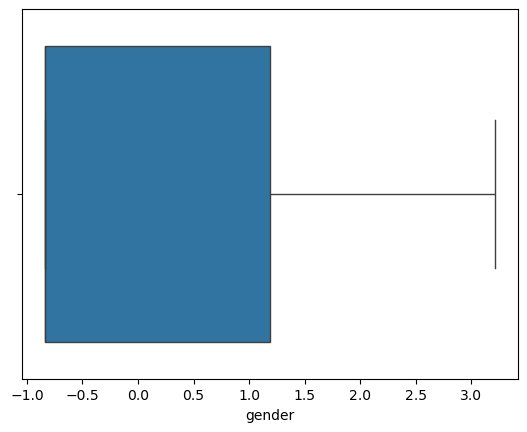

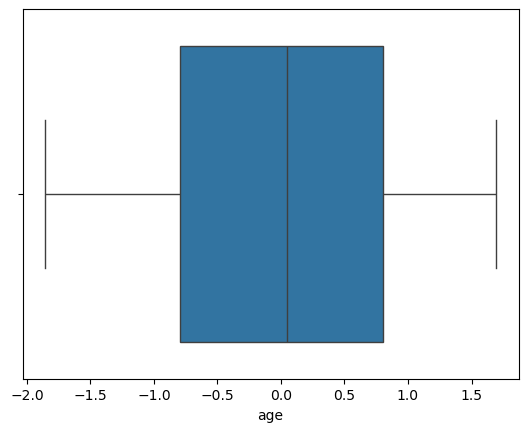

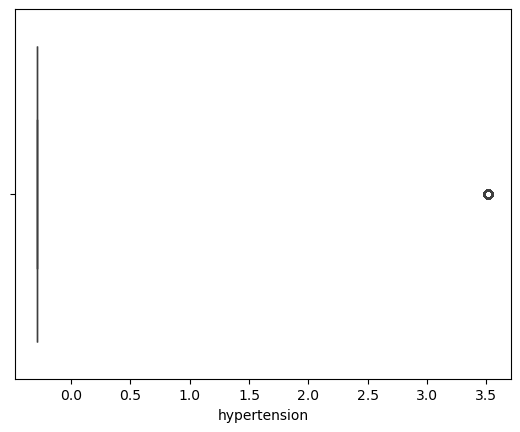

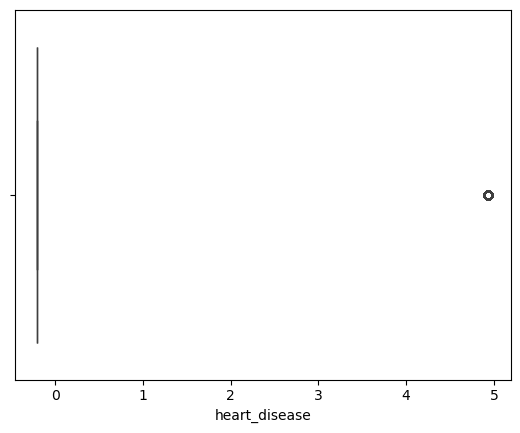

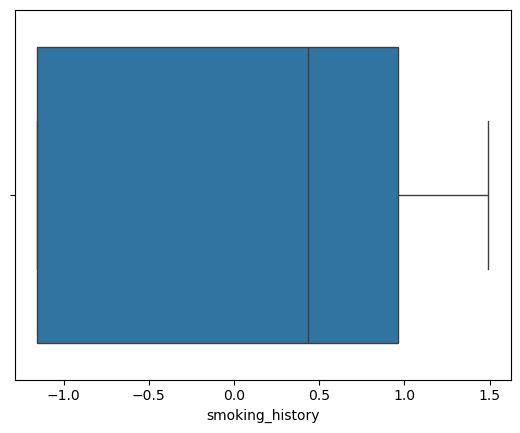

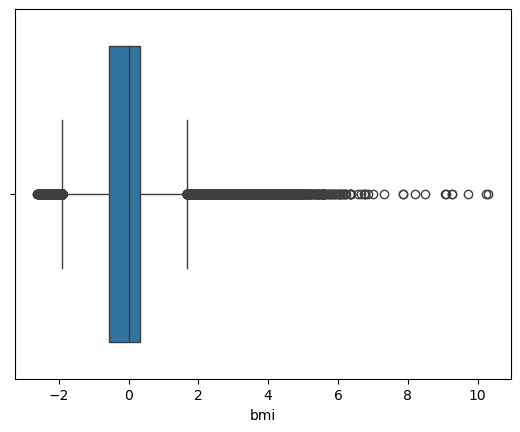

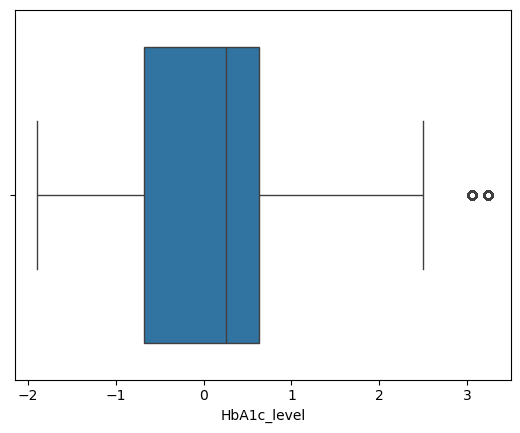

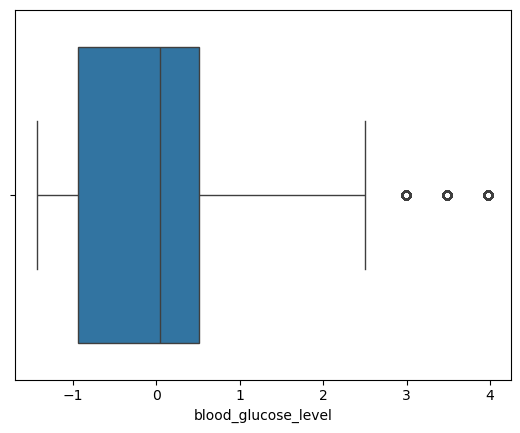

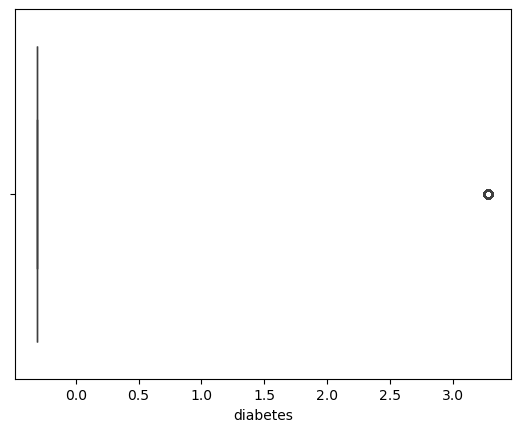

In [10]:
for column in scaled_df:
    plt.figure()
    sns.boxplot(x=scaled_df[column])

<Axes: >

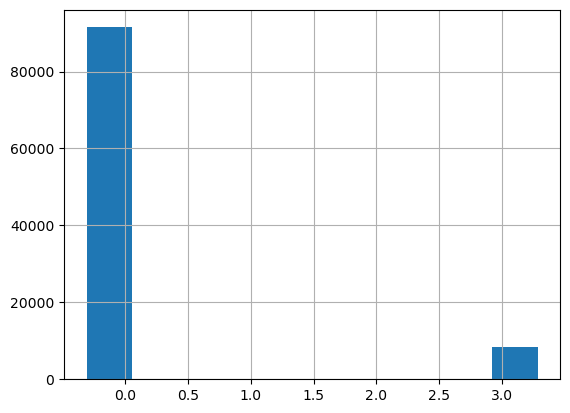

In [11]:
scaled_df['diabetes'].hist()

<Axes: >

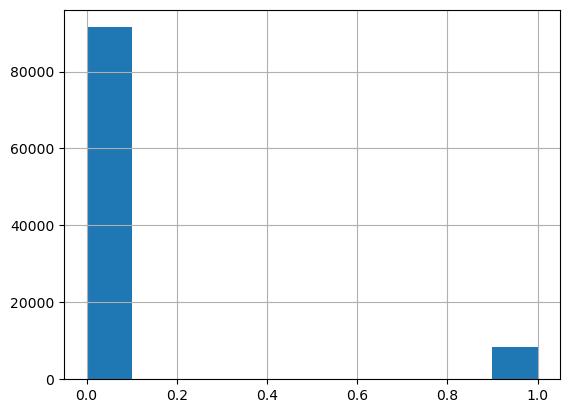

In [12]:
cal_df['diabetes'].hist()

### Splitting Features and Target
- **Features (`X`)**: Extracted all columns except `Diabetes` as predictors.
  - Verified using `X.info()` and checked the shape with `X.shape`.
- **Target (`y`)**: Selected the `Diabetes` column as the target variable.
  - Used `y.describe()` to view summary statistics and `y.shape` to confirm its size.

In [14]:
X = scaled_df.drop('diabetes', axis = 1)
print (X.info())
print (X.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  float64
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  float64
 3   heart_disease        100000 non-null  float64
 4   smoking_history      100000 non-null  float64
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  float64
dtypes: float64(8)
memory usage: 6.1 MB
None
(100000, 8)


In [15]:
y = scaled_df['diabetes']

print (y.describe())
print (y.shape)

count    1.000000e+05
mean    -7.872814e-17
std      1.000005e+00
min     -3.047887e-01
25%     -3.047887e-01
50%     -3.047887e-01
75%     -3.047887e-01
max      3.280961e+00
Name: diabetes, dtype: float64
(100000,)


In [52]:
y = cal_df['blood_glucose_level']
print(y.describe())
print (y.shape)

count    100000.000000
mean        138.058060
std          40.708136
min          80.000000
25%         100.000000
50%         140.000000
75%         159.000000
max         300.000000
Name: blood_glucose_level, dtype: float64
(100000,)


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)

np.savetxt("diabetesTrain.csv", np.column_stack((X_train, Y_train)), delimiter=",", fmt="%.6f")
np.savetxt("diabetesTest.csv", np.column_stack((X_test, Y_test)), delimiter=",", fmt="%.6f")

print("Training and testing sets saved as 'diabetesTrain.csv' and 'diabetesTest.csv'.")

Training and testing sets saved as 'diabetesTrain.csv' and 'diabetesTest.csv'.


# Applying K-Nearest Neighbors (K-NN)

In this section, we apply the **K-Nearest Neighbors (K-NN)** algorithm to the preprocessed diabetes dataset. The objective is to evaluate the model's performance across various configurations and identify the optimal settings for classification. 

### Steps:
1. **Experiment with different `k` values**:
   - Test `k` ranging from 1 to 100 to observe its impact on accuracy.

2. **Evaluate multiple distance metrics**:
   - **Euclidean Distance**
   - **Manhattan Distance**

3. **Compare weighting schemes**:
   - **Uniform Weights**: All neighbors are treated equally.
   - **Distance-Weighted**: Closer neighbors have a greater influence on the prediction.

### Evaluation Methodology:
For each configuration:
- Compute the accuracy for every `k` from 1 to 100.
- Plot accuracy values to visualize the impact of `k` and the chosen parameters.
- Analyze the results to determine the optimal combination of `k`, distance metric, and weighting scheme.

### Configurations to Test:
The following parameter combinations will be evaluated:
1. Euclidean distance with uniform weights.
2. Manhattan distance with uniform weights.
3. Euclidean distance with distance-based weights.
4. Manhattan distance with distance-based weights.

The accuracy for each configuration will be plotted, and the results will help identify the optimal setings for the K-NN algorithm.
l settings.


In [18]:
def question1Part1(train_features, train_labels, test_features, test_labels, dmetric, w):  
    allResults = []
    
    for kValue in range(1, 101):
        knn = neighbors.KNeighborsClassifier(n_neighbors=kValue, metric=dmetric, weights=w)
        knn = knn.fit(train_features, train_labels)
        accuracy = knn.score(test_features, test_labels)
        allResults.append(accuracy)
        print(f"k={kValue}, Accuracy={accuracy:.4f}")
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 101), allResults, marker="o")
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Accuracy")
    plt.title(f"K-NN Accuracy for Distance Metric: {dmetric}, Weights: {w}")
    plt.grid()
    plt.show()
    
    return allResults

Train Features Shape: (80000, 8)
Train Labels Shape: (80000,)
Test Features Shape: (20000, 8)
Test Labels Shape: (20000,)
k=1, Accuracy=0.9504
k=2, Accuracy=0.9623
k=3, Accuracy=0.9603
k=4, Accuracy=0.9625
k=5, Accuracy=0.9611
k=6, Accuracy=0.9621
k=7, Accuracy=0.9624
k=8, Accuracy=0.9620
k=9, Accuracy=0.9624
k=10, Accuracy=0.9626
k=11, Accuracy=0.9633
k=12, Accuracy=0.9633
k=13, Accuracy=0.9634
k=14, Accuracy=0.9632
k=15, Accuracy=0.9636
k=16, Accuracy=0.9629
k=17, Accuracy=0.9634
k=18, Accuracy=0.9629
k=19, Accuracy=0.9635
k=20, Accuracy=0.9628
k=21, Accuracy=0.9635
k=22, Accuracy=0.9633
k=23, Accuracy=0.9633
k=24, Accuracy=0.9629
k=25, Accuracy=0.9629
k=26, Accuracy=0.9628
k=27, Accuracy=0.9631
k=28, Accuracy=0.9625
k=29, Accuracy=0.9628
k=30, Accuracy=0.9624
k=31, Accuracy=0.9625
k=32, Accuracy=0.9623
k=33, Accuracy=0.9627
k=34, Accuracy=0.9622
k=35, Accuracy=0.9624
k=36, Accuracy=0.9619
k=37, Accuracy=0.9619
k=38, Accuracy=0.9617
k=39, Accuracy=0.9619
k=40, Accuracy=0.9618
k=41, A

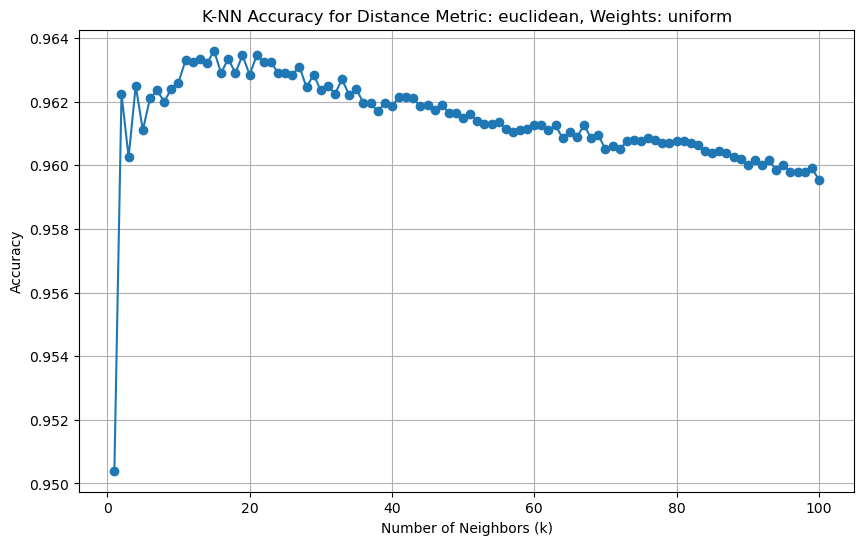

[0.9504,
 0.96225,
 0.96025,
 0.9625,
 0.9611,
 0.9621,
 0.96235,
 0.962,
 0.9624,
 0.9626,
 0.9633,
 0.96325,
 0.96335,
 0.9632,
 0.9636,
 0.9629,
 0.96335,
 0.9629,
 0.96345,
 0.96285,
 0.96345,
 0.96325,
 0.96325,
 0.9629,
 0.9629,
 0.96285,
 0.9631,
 0.96245,
 0.96285,
 0.96235,
 0.9625,
 0.96225,
 0.9627,
 0.9622,
 0.9624,
 0.96195,
 0.96195,
 0.9617,
 0.96195,
 0.96185,
 0.96215,
 0.96215,
 0.9621,
 0.96185,
 0.9619,
 0.96175,
 0.9619,
 0.96165,
 0.96165,
 0.9615,
 0.9616,
 0.9614,
 0.9613,
 0.9613,
 0.96135,
 0.96115,
 0.96105,
 0.9611,
 0.96115,
 0.96125,
 0.96125,
 0.9611,
 0.96125,
 0.96085,
 0.96105,
 0.9609,
 0.96125,
 0.96085,
 0.96095,
 0.9605,
 0.9606,
 0.9605,
 0.96075,
 0.9608,
 0.96075,
 0.96085,
 0.9608,
 0.9607,
 0.9607,
 0.96075,
 0.96075,
 0.9607,
 0.96065,
 0.96045,
 0.9604,
 0.96045,
 0.9604,
 0.96025,
 0.9602,
 0.96,
 0.96015,
 0.96,
 0.96015,
 0.95985,
 0.96,
 0.9598,
 0.9598,
 0.9598,
 0.9599,
 0.95955]

In [19]:
diabetesTrain = np.genfromtxt("diabetesTrain.csv", delimiter=",")
diabetesTest = np.genfromtxt("diabetesTest.csv", delimiter=",")

train_features = diabetesTrain[:, :-1]
train_labels = diabetesTrain[:, -1].astype(int) 
test_features = diabetesTest[:, :-1]
test_labels = diabetesTest[:, -1].astype(int) 

print("Train Features Shape:", train_features.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Features Shape:", test_features.shape)
print("Test Labels Shape:", test_labels.shape)

question1Part1(train_features, train_labels, test_features, test_labels, "euclidean", "uniform")

k=1, Accuracy=0.9495
k=2, Accuracy=0.9620
k=3, Accuracy=0.9598
k=4, Accuracy=0.9621
k=5, Accuracy=0.9619
k=6, Accuracy=0.9627
k=7, Accuracy=0.9636
k=8, Accuracy=0.9631
k=9, Accuracy=0.9638
k=10, Accuracy=0.9627
k=11, Accuracy=0.9637
k=12, Accuracy=0.9632
k=13, Accuracy=0.9637
k=14, Accuracy=0.9634
k=15, Accuracy=0.9638
k=16, Accuracy=0.9632
k=17, Accuracy=0.9632
k=18, Accuracy=0.9627
k=19, Accuracy=0.9630
k=20, Accuracy=0.9625
k=21, Accuracy=0.9628
k=22, Accuracy=0.9625
k=23, Accuracy=0.9630
k=24, Accuracy=0.9624
k=25, Accuracy=0.9627
k=26, Accuracy=0.9624
k=27, Accuracy=0.9628
k=28, Accuracy=0.9620
k=29, Accuracy=0.9626
k=30, Accuracy=0.9619
k=31, Accuracy=0.9622
k=32, Accuracy=0.9617
k=33, Accuracy=0.9623
k=34, Accuracy=0.9618
k=35, Accuracy=0.9623
k=36, Accuracy=0.9619
k=37, Accuracy=0.9625
k=38, Accuracy=0.9617
k=39, Accuracy=0.9620
k=40, Accuracy=0.9616
k=41, Accuracy=0.9617
k=42, Accuracy=0.9617
k=43, Accuracy=0.9619
k=44, Accuracy=0.9617
k=45, Accuracy=0.9617
k=46, Accuracy=0.96

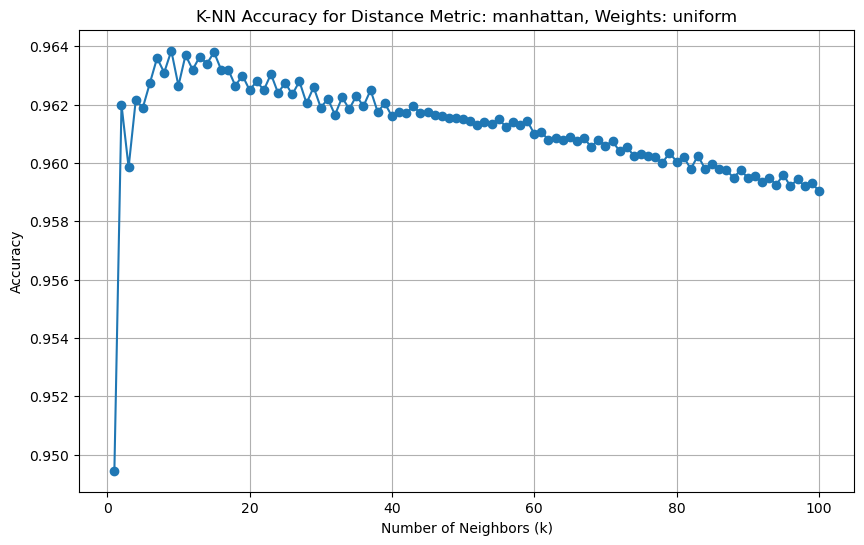

[0.94945,
 0.962,
 0.95985,
 0.96215,
 0.9619,
 0.96275,
 0.9636,
 0.9631,
 0.96385,
 0.96265,
 0.9637,
 0.9632,
 0.96365,
 0.9634,
 0.9638,
 0.9632,
 0.9632,
 0.96265,
 0.963,
 0.9625,
 0.9628,
 0.9625,
 0.96305,
 0.9624,
 0.96275,
 0.96235,
 0.9628,
 0.96205,
 0.9626,
 0.9619,
 0.9622,
 0.96165,
 0.96225,
 0.96185,
 0.9623,
 0.96195,
 0.9625,
 0.96175,
 0.96205,
 0.9616,
 0.96175,
 0.9617,
 0.96195,
 0.9617,
 0.96175,
 0.96165,
 0.9616,
 0.96155,
 0.96155,
 0.9615,
 0.96145,
 0.9613,
 0.9614,
 0.96135,
 0.9615,
 0.96125,
 0.9614,
 0.9613,
 0.96145,
 0.961,
 0.96105,
 0.9608,
 0.96085,
 0.9608,
 0.9609,
 0.96075,
 0.96085,
 0.96055,
 0.9608,
 0.9606,
 0.96075,
 0.9604,
 0.96055,
 0.96025,
 0.9603,
 0.96025,
 0.9602,
 0.96,
 0.96035,
 0.96005,
 0.9602,
 0.9598,
 0.96025,
 0.9598,
 0.95995,
 0.9598,
 0.95975,
 0.9595,
 0.95975,
 0.9595,
 0.95955,
 0.95935,
 0.9595,
 0.95925,
 0.9596,
 0.9592,
 0.95945,
 0.9592,
 0.9593,
 0.95905]

In [20]:
question1Part1(train_features, train_labels, test_features, test_labels, "manhattan", "uniform")

k=1, Accuracy=0.9504
k=2, Accuracy=0.9510
k=3, Accuracy=0.9585
k=4, Accuracy=0.9589
k=5, Accuracy=0.9598
k=6, Accuracy=0.9604
k=7, Accuracy=0.9609
k=8, Accuracy=0.9614
k=9, Accuracy=0.9617
k=10, Accuracy=0.9619
k=11, Accuracy=0.9625
k=12, Accuracy=0.9631
k=13, Accuracy=0.9628
k=14, Accuracy=0.9634
k=15, Accuracy=0.9631
k=16, Accuracy=0.9630
k=17, Accuracy=0.9629
k=18, Accuracy=0.9634
k=19, Accuracy=0.9633
k=20, Accuracy=0.9633
k=21, Accuracy=0.9630
k=22, Accuracy=0.9633
k=23, Accuracy=0.9630
k=24, Accuracy=0.9629
k=25, Accuracy=0.9629
k=26, Accuracy=0.9630
k=27, Accuracy=0.9627
k=28, Accuracy=0.9627
k=29, Accuracy=0.9627
k=30, Accuracy=0.9627
k=31, Accuracy=0.9628
k=32, Accuracy=0.9627
k=33, Accuracy=0.9628
k=34, Accuracy=0.9627
k=35, Accuracy=0.9628
k=36, Accuracy=0.9625
k=37, Accuracy=0.9626
k=38, Accuracy=0.9625
k=39, Accuracy=0.9623
k=40, Accuracy=0.9623
k=41, Accuracy=0.9623
k=42, Accuracy=0.9622
k=43, Accuracy=0.9620
k=44, Accuracy=0.9623
k=45, Accuracy=0.9619
k=46, Accuracy=0.96

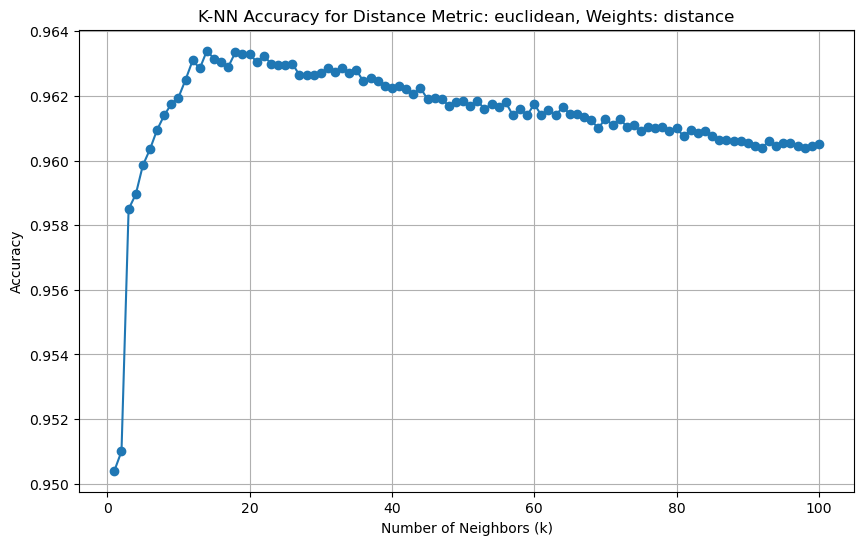

[0.9504,
 0.951,
 0.9585,
 0.95895,
 0.95985,
 0.96035,
 0.96095,
 0.9614,
 0.96175,
 0.96195,
 0.9625,
 0.9631,
 0.96285,
 0.9634,
 0.96315,
 0.96305,
 0.9629,
 0.96335,
 0.9633,
 0.9633,
 0.96305,
 0.96325,
 0.963,
 0.96295,
 0.96295,
 0.963,
 0.96265,
 0.96265,
 0.96265,
 0.9627,
 0.96285,
 0.96275,
 0.96285,
 0.9627,
 0.9628,
 0.96245,
 0.96255,
 0.96245,
 0.9623,
 0.96225,
 0.9623,
 0.9622,
 0.96205,
 0.96225,
 0.9619,
 0.96195,
 0.9619,
 0.9617,
 0.9618,
 0.96185,
 0.9617,
 0.96185,
 0.9616,
 0.96175,
 0.96165,
 0.9618,
 0.9614,
 0.9616,
 0.9614,
 0.96175,
 0.9614,
 0.96155,
 0.9614,
 0.96165,
 0.96145,
 0.96145,
 0.96135,
 0.96125,
 0.961,
 0.9613,
 0.9611,
 0.9613,
 0.96105,
 0.9611,
 0.9609,
 0.96105,
 0.961,
 0.96105,
 0.9609,
 0.961,
 0.96075,
 0.96095,
 0.96085,
 0.9609,
 0.96075,
 0.96065,
 0.96065,
 0.9606,
 0.9606,
 0.96055,
 0.96045,
 0.9604,
 0.9606,
 0.96045,
 0.96055,
 0.96055,
 0.96045,
 0.9604,
 0.96045,
 0.9605]

In [21]:
question1Part1(train_features, train_labels, test_features, test_labels, "euclidean", "distance")

k=1, Accuracy=0.9495
k=2, Accuracy=0.9502
k=3, Accuracy=0.9581
k=4, Accuracy=0.9591
k=5, Accuracy=0.9601
k=6, Accuracy=0.9611
k=7, Accuracy=0.9615
k=8, Accuracy=0.9620
k=9, Accuracy=0.9620
k=10, Accuracy=0.9620
k=11, Accuracy=0.9622
k=12, Accuracy=0.9626
k=13, Accuracy=0.9629
k=14, Accuracy=0.9635
k=15, Accuracy=0.9635
k=16, Accuracy=0.9632
k=17, Accuracy=0.9630
k=18, Accuracy=0.9633
k=19, Accuracy=0.9630
k=20, Accuracy=0.9627
k=21, Accuracy=0.9626
k=22, Accuracy=0.9626
k=23, Accuracy=0.9627
k=24, Accuracy=0.9629
k=25, Accuracy=0.9626
k=26, Accuracy=0.9628
k=27, Accuracy=0.9624
k=28, Accuracy=0.9627
k=29, Accuracy=0.9623
k=30, Accuracy=0.9624
k=31, Accuracy=0.9624
k=32, Accuracy=0.9621
k=33, Accuracy=0.9624
k=34, Accuracy=0.9623
k=35, Accuracy=0.9624
k=36, Accuracy=0.9624
k=37, Accuracy=0.9624
k=38, Accuracy=0.9624
k=39, Accuracy=0.9624
k=40, Accuracy=0.9619
k=41, Accuracy=0.9620
k=42, Accuracy=0.9621
k=43, Accuracy=0.9621
k=44, Accuracy=0.9621
k=45, Accuracy=0.9620
k=46, Accuracy=0.96

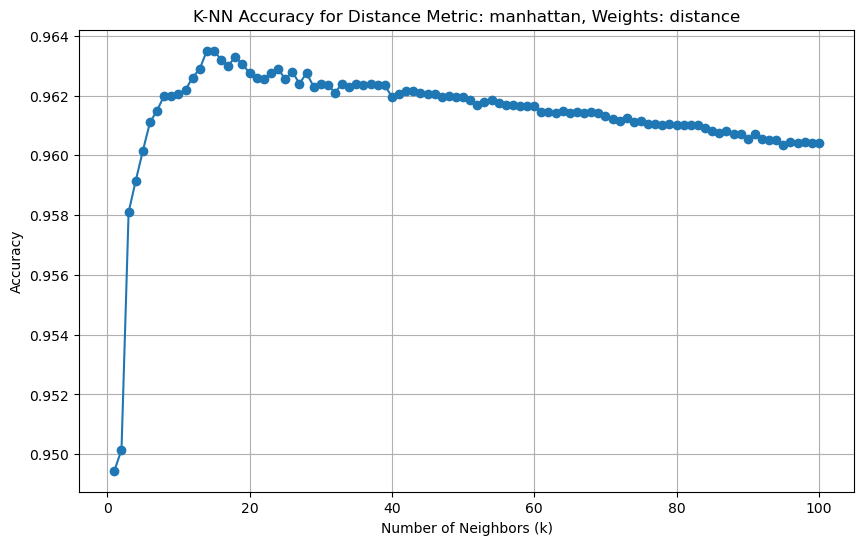

[0.94945,
 0.95015,
 0.9581,
 0.95915,
 0.96015,
 0.9611,
 0.9615,
 0.962,
 0.962,
 0.96205,
 0.9622,
 0.9626,
 0.9629,
 0.9635,
 0.9635,
 0.9632,
 0.963,
 0.9633,
 0.96305,
 0.96275,
 0.9626,
 0.96255,
 0.96275,
 0.9629,
 0.96255,
 0.9628,
 0.9624,
 0.96275,
 0.9623,
 0.9624,
 0.96235,
 0.9621,
 0.9624,
 0.9623,
 0.9624,
 0.96235,
 0.9624,
 0.96235,
 0.96235,
 0.96195,
 0.96205,
 0.96215,
 0.96215,
 0.9621,
 0.96205,
 0.96205,
 0.96195,
 0.962,
 0.96195,
 0.96195,
 0.96185,
 0.9617,
 0.9618,
 0.96185,
 0.96175,
 0.9617,
 0.9617,
 0.96165,
 0.96165,
 0.96165,
 0.96145,
 0.96145,
 0.9614,
 0.9615,
 0.9614,
 0.96145,
 0.9614,
 0.96145,
 0.9614,
 0.9613,
 0.9612,
 0.96115,
 0.96125,
 0.9611,
 0.96115,
 0.96105,
 0.96105,
 0.961,
 0.96105,
 0.961,
 0.961,
 0.961,
 0.961,
 0.9609,
 0.9608,
 0.96075,
 0.9608,
 0.9607,
 0.9607,
 0.96055,
 0.9607,
 0.96055,
 0.9605,
 0.9605,
 0.96035,
 0.96045,
 0.9604,
 0.96045,
 0.9604,
 0.9604]

In [22]:
question1Part1(train_features, train_labels, test_features, test_labels, "manhattan", "distance")

### Final Observations and Insights

I tested K-NN on the diabetes dataset with different settings:
- **k**: Ranged from 1 to 100.
- **Distance Metrics**: Euclidean and Manhattan.
- **Weights**: Uniform and distance-based.

#### Key Takeaways:
- Best accuracy was around k = 15-20.
- Euclidean and Manhattan gave similar results, but Euclidean was a bit more consistent.
- Distance-based weights worked better for higher k values.

#### Conclusion:
K-NN worked well for this dataset, especially with lower k values.

# Logistic Regression for Diabetes Prediction

I trained a Logistic Regression model to predict diabetes (0 = No, 1 = Yes). Had to convert y target to binary, and the model was trained using the `liblinear` solver like in our lab example. Evaluated the model using a confusion matrix and calculated the accuracy, which shows how well it predicts diabetes. A histogram was also plotted to visualize the distribution of the target variable.

In [40]:
y_train_lr = (y_train > 0).astype(int)
y_test_lr = (y_test > 0).astype(int)

print("Unique values in y_train_lr:", np.unique(y_train_lr))
print("Unique values in y_test_lr:", np.unique(y_test_lr))

Unique values in y_train_lr: [0 1]
Unique values in y_test_lr: [0 1]


Feature matrix shape: (100000, 8)
Target vector shape: (100000,)

Feature values for the 13th instance:
gender                -0.841047
age                    1.115355
hypertension          -0.284439
heart_disease         -0.202578
smoking_history        0.963327
bmi                   -0.245718
HbA1c_level            0.254508
blood_glucose_level    1.521618
Name: 13, dtype: float64
Target value for the 13th instance: -0.3047887380849036


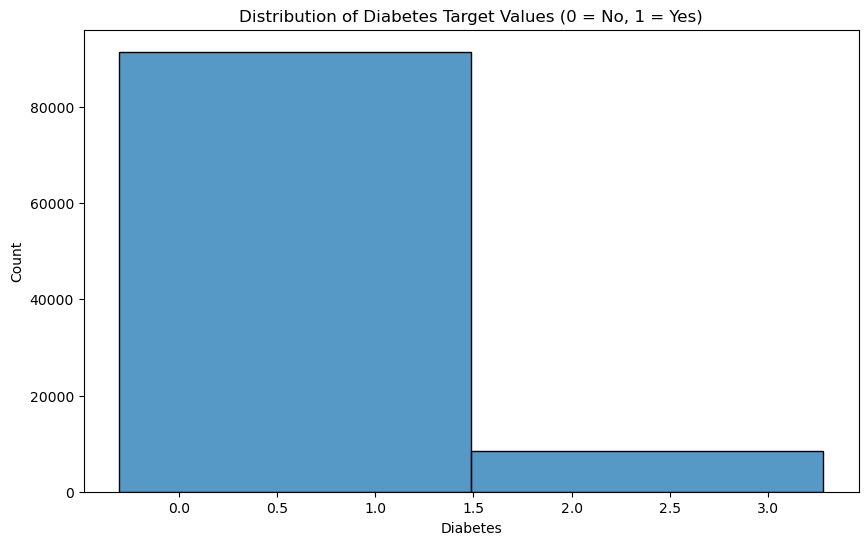

In [25]:
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
print("\nFeature values for the 13th instance:")
print(X.iloc[13])
print("Target value for the 13th instance:", y.iloc[13])

plt.figure(figsize=(10, 6))
sns.histplot(y, bins=2, kde=False)
plt.title("Distribution of Diabetes Target Values (0 = No, 1 = Yes)")
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()

Accuracy: 0.9616


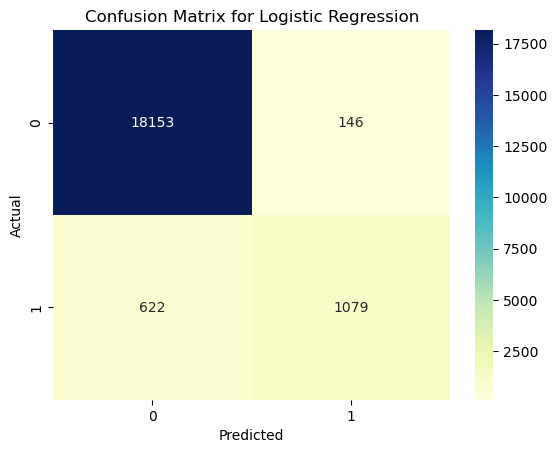

In [54]:
logisticRegr = LogisticRegression(solver='liblinear', random_state=1)
logisticRegr.fit(X_train, y_train_lr)

predictions = logisticRegr.predict(X_test)

confusion_matrix = pd.crosstab(y_test_lr, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", fmt="d")

print('Accuracy:', metrics.accuracy_score(y_test_lr, predictions))
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

# Conclusion:
I used K-NN and Logistic Regression to predict diabetes. K-NN reached up to 96% accuracy, while Logistic Regression got 91.5%, showing both models worked well for this task.
